In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib_scalebar.scalebar import ScaleBar

## SOMA

In [3]:
syns_type = 'soma'
num_syns = [50, 200, 450]

soma_sims_data = {num_syn: {} for num_syn in num_syns}

for i, num_syn in enumerate(num_syns):

    sim_label = f'FR_{syns_type}-{num_syn}Ex1-1x40Hz-active'

    output_dir = os.path.join('/home/kedoxey/CRCNS/PyramidalCellSimulations','models/NEURON/NMLCL000073-NEURON','output')
    sim_fname = f'L5PC_{sim_label}_data.pkl'
    sim_path = os.path.join(output_dir, f'FR_{syns_type}', sim_label, sim_fname)

    with open(sim_path,'rb') as fp:
        all_data = pickle.load(fp)

    simData = all_data['simData']

    soma_sims_data[num_syn]['t'] = np.array(simData['t'])
    soma_sims_data[num_syn]['V_soma'] = np.array(simData['V_soma']['cell_0'])

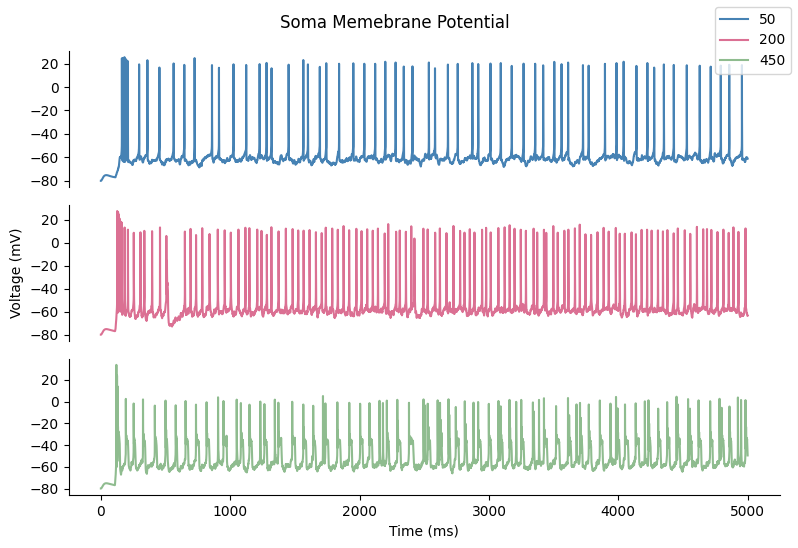

In [9]:

num_syns = [50, 200, 450]
%matplotlib inline
fig, axs = plt.subplots(3,1,figsize=(8,5.5))
axs = axs.ravel()

colors = ['steelblue', 'palevioletred', 'darkseagreen']

for i, num_syn in enumerate(num_syns):

    t = soma_sims_data[num_syn]['t']
    V_soma = soma_sims_data[num_syn]['V_soma']

    axs[i].plot(t, V_soma, zorder=12, label=num_syn, color=colors[i])
    axs[i].set_yticks([-80, -60, -40, -20, 0, 20])
    # axs[i].set_title(f'{num_syn} synapses')
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    # axs[i].text(1.01,0.5, f"{num_syn}", size=10, ha="center", transform=axs[i].transAxes)


    scalebar = AnchoredSizeBar(axs[i].transData,
                                1, '40 mV', 'lower right', 
                                pad=0.1,
                                color='black',
                                frameon=False,
                                size_vertical=40)

    # axs[i].add_artist(scalebar)


axs[1].set_ylabel('Voltage (mV)')
axs[0].set_xticks([])
axs[1].set_xticks([])
axs[-1].set_xlabel('Time (ms)')
axs[-1].spines['bottom'].set_visible(True)

# axs[0].text(1.01,1.5, 'Number of Synapses', size=12, ha="center", transform=axs[0].transAxes)

# fig.text(1, 0.95, "Number of Synapses", fontsize=10, ha='center')

fig.legend(loc='upper right')

fig.suptitle('Soma Memebrane Potential')
fig.tight_layout()
fig.savefig(os.path.join(output_dir, 'firing_rates', 'soma_time_series.png'),dpi=300)

## BASAL

In [5]:
syns_type = 'basal'
num_syns = [50, 200, 350]

basal_sims_data = {num_syn: {} for num_syn in num_syns}

for i, num_syn in enumerate(num_syns):

    sim_label = f'FR_{syns_type}-{num_syn}Ex1-1x40Hz-active'

    output_dir = os.path.join('/home/kedoxey/CRCNS/PyramidalCellSimulations','models/NEURON/NMLCL000073-NEURON','output')
    sim_fname = f'L5PC_{sim_label}_data.pkl'
    sim_path = os.path.join(output_dir, f'FR_{syns_type}', sim_label, sim_fname)

    with open(sim_path,'rb') as fp:
        all_data = pickle.load(fp)

    simData = all_data['simData']

    basal_sims_data[num_syn]['t'] = np.array(simData['t'])
    basal_sims_data[num_syn]['V_soma'] = np.array(simData['V_soma']['cell_0'])

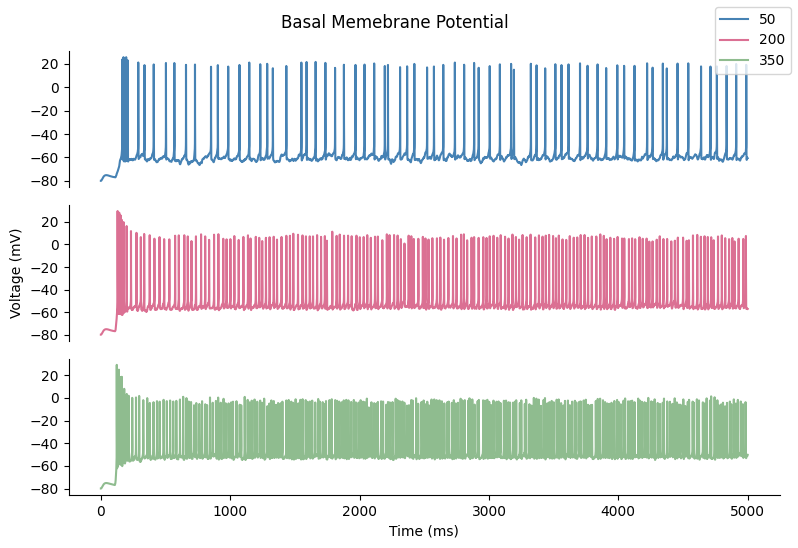

In [7]:


%matplotlib inline
fig, axs = plt.subplots(3,1,figsize=(8,5.5))
axs = axs.ravel()

colors = ['steelblue', 'palevioletred', 'darkseagreen']

for i, num_syn in enumerate(num_syns):

    t = basal_sims_data[num_syn]['t']
    V_soma = basal_sims_data[num_syn]['V_soma']

    axs[i].plot(t, V_soma, zorder=12, label=num_syn, color=colors[i])
    axs[i].set_yticks([-80, -60, -40, -20, 0, 20])
    # axs[i].set_title(f'{num_syn} synapses')
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    # axs[i].text(1.01,0.5, f"{num_syn}", size=10, ha="center", transform=axs[i].transAxes)


    scalebar = AnchoredSizeBar(axs[i].transData,
                                1, '40 mV', 'lower right', 
                                pad=0.1,
                                color='black',
                                frameon=False,
                                size_vertical=40)

    # axs[i].add_artist(scalebar)


axs[1].set_ylabel('Voltage (mV)')
axs[0].set_xticks([])
axs[1].set_xticks([])
axs[-1].set_xlabel('Time (ms)')
axs[-1].spines['bottom'].set_visible(True)

# axs[0].text(1.01,1.5, 'Number of Synapses', size=12, ha="center", transform=axs[0].transAxes)

# fig.text(1, 0.95, "Number of Synapses", fontsize=10, ha='center')

fig.legend(loc='upper right')

fig.suptitle('Basal Memebrane Potential')
fig.tight_layout()
fig.savefig(os.path.join(output_dir, 'firing_rates', 'basal_time_series.png'),dpi=300)